In [61]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn.metrics as sm
import seaborn as sns

In [10]:
#Chargement des données
iris = datasets.load_iris()

In [68]:
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length' , ' Sepal width', ' Petal length', 'Petal width']
target = pd.DataFrame(iris.target)

In [69]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
#Choix du nombre parfait de clusters
inertia = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

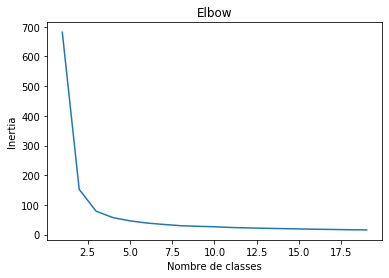

In [20]:
#Elbow method pour choisir le nombre de cluster
plt.plot(range(1,20), inertia)
plt.title('Elbow')
plt.xlabel('Nombre de classes')
plt.ylabel('Inertia')
plt.show()

Selon la méthode elbow, on voit que le nombre optimal est 3

In [59]:
#Modele
model = KMeans(n_clusters = 3) 
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
y_true = target
y_pred = model.predict(data) 

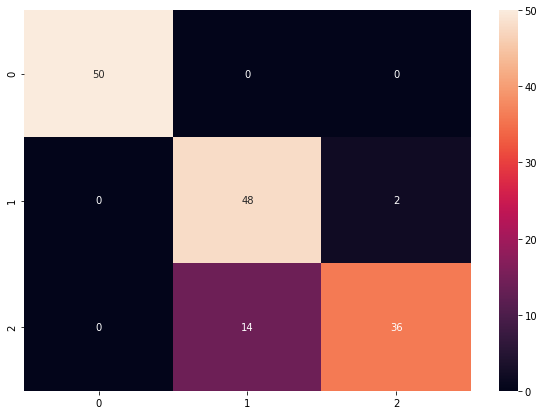

In [64]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [66]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8933333333333333